# Data Assignment 3

1) **Will Barmby (931150290)**
2) **Mike Markarian (931140514)**

for *Intermediate Macro*  
W&amp;M ECON 304  


## 1) 

**You may use GenAI to help with debugging your code for 1a. Do not use GenAI on question 1b.**

Get the following U.S. labor market data:
- Job Openings: Total Nonfarm, Thousands, Monthly, Seasonally Adjusted (FRED: JTSJOL)
- Unemployment Level, Thousands, Monthly, Seasonally Adjusted (FRED: UNEMPLOY)

### a.

From Dec. 2000 to Dec. 2024, plot the ratio of job openings to unemployment. This in labor economics is known as "labor market tightness" from a firm's perspective, i.e., if vacancies are high relative to unemployment, then the labor market is tight and it is difficult to hire workers.

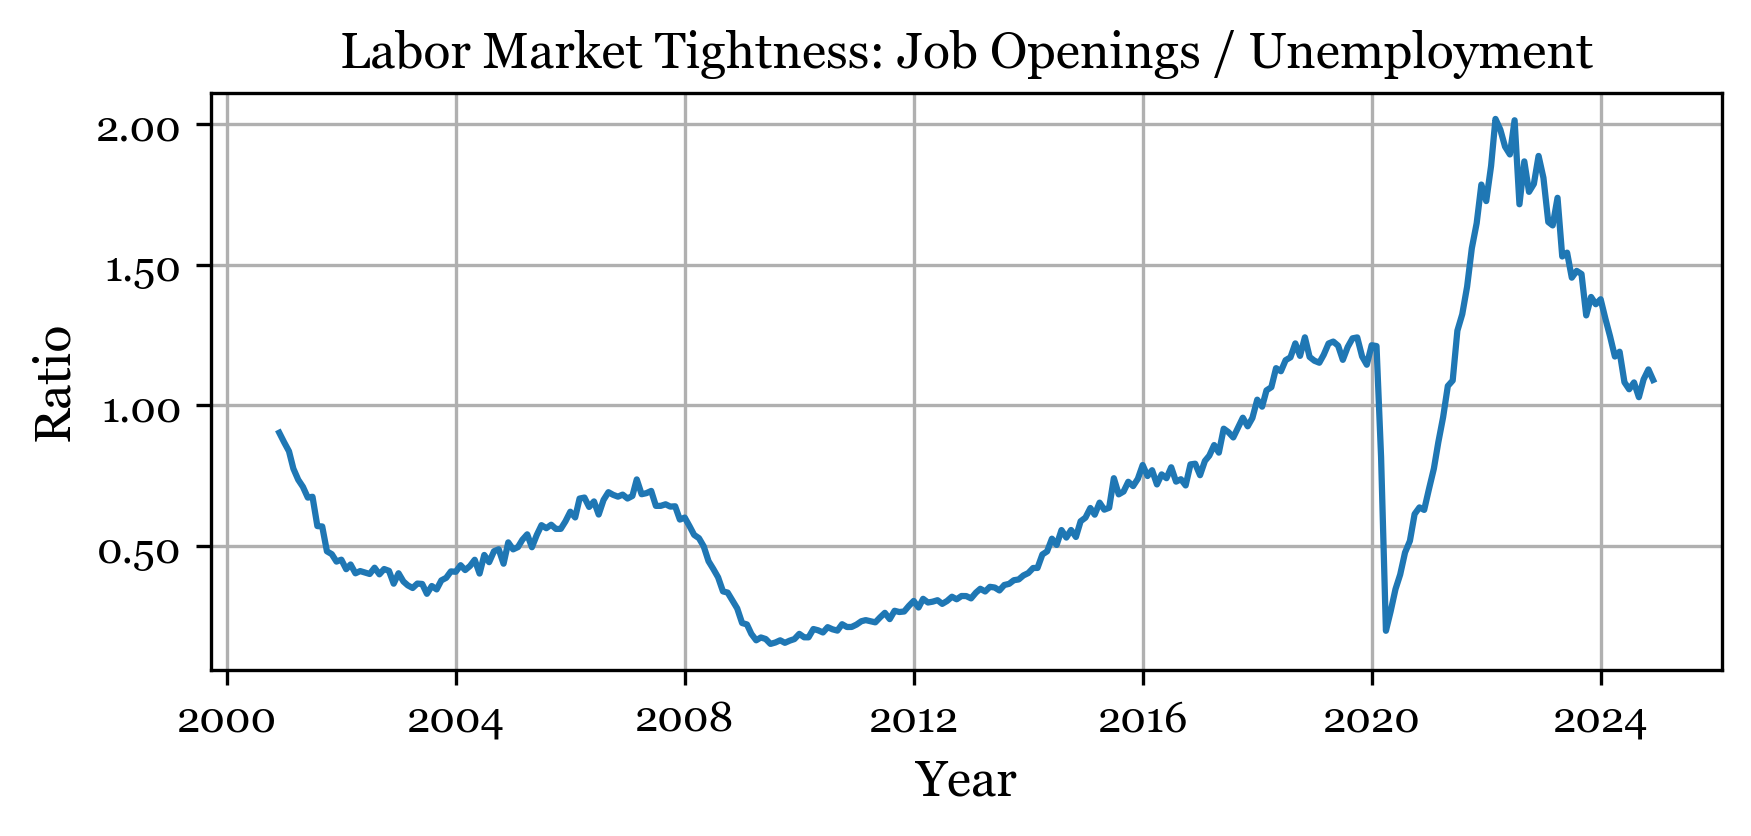

In [ ]:
import importlib, utils
utils = importlib.reload(utils)
import pandas as pd
from fredapi import Fred
from config import FRED_API_KEY

fred = Fred(api_key=FRED_API_KEY)
start_date = '2000-12-01'
end_date = '2024-12-31'

series_dict = {
    'JTSJOL': 'Job Openings: Total Nonfarm',
    'UNEMPLOY'   : 'Unemployment Level'
}
df = pd.DataFrame()
for code in series_dict:
    df[code] = fred.get_series(code, observation_start=start_date, observation_end=end_date)


# Create ratio of Job Openings to Unemployment
df["JO_to_UN_ratio"] = df["JTSJOL"] / df["UNEMPLOY"]
df = df.dropna(subset=["JO_to_UN_ratio"])

# Access just that series
ratio_series = df["JO_to_UN_ratio"]

# Optionally pass it into your plotting function
utils.plot_dataframe_series(
    df,
    columns=["JO_to_UN_ratio"],
        title=f"Labor Market Tightness: Job Openings / Unemployment",
        ylabel="Ratio",
        xlabel="Year", 
        yaxis_format="{x:,.2f}"
)



### b.

Use the figure to discuss the 2021-23 "labor market shortage". How does that period compare to past economic recoveries? How do you think worker bargaining power changed during that time? Why?

That period is markedly different from the recent economic recover of the early and mid 2010s — it's a much faster recovery, and labor market tightness (LMT) reaches an over 20 year high during this time. It's essentially much more volatile, where LMT dropped from a higher spot than where it was pre-2008 to a similar trough, then climbed back up faster than it did in the 2010s to a much higher peak. This peak means that the bargaining power of workers must have been pretty substantial during this period, likely due to the structural changes from covid. For example, workers may have adjusted to staying at home and have been slow to move back into the labor force. Another structural change was the increase in adopton of remote work tech and practices, which increased the flexibility of work. This might have led to the refactoring of jobs into smaller jobs with reduced pay and hours, increasing the total positions available, while allow people in a greater array of situations (familial and geographic) to work. With this newfound flexibility, workers likely gained power over their employers (as workers could threaten resignation if employers didn't meet their demands). Employers, meanwhile, probably had to increase their compensation and/or benefits to give them a clear edge over all other hirers. If this was the case, this would lead to above-average wage growth and inflation from increased incomes.

## 2) 

**You may use GenAI to help with debugging your code for 2a. Do not use GenAI on question 2b.**

Get data on layoffs and quits:
- Layoffs and Discharges: Total Nonfarm, Rate, Seasonally Adjusted (FRED: JTSLDR)
- Quits: Total Nonfarm, Rate, Seasonally Adjusted (FRED: JTSQUR)

### a.

From Dec. 2000 to Dec. 2024, plot the layoff and quit rates on the same figure.

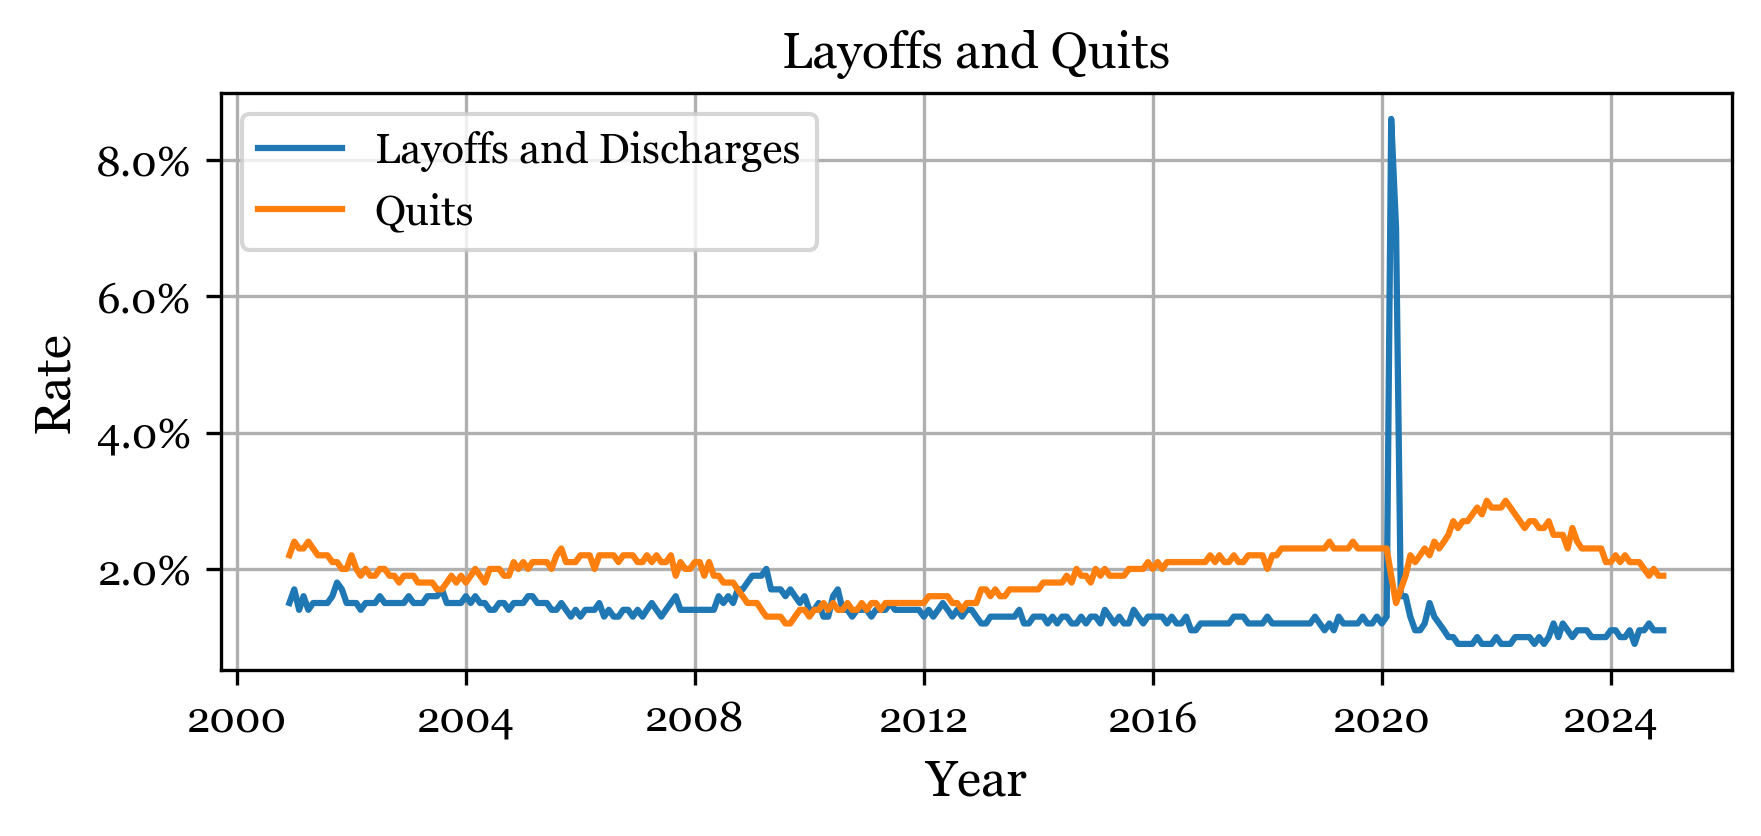

In [27]:
import importlib, utils
utils = importlib.reload(utils)
import pandas as pd
from fredapi import Fred
from config import FRED_API_KEY

fred = Fred(api_key=FRED_API_KEY)
start_date = '2000-12-01'
end_date = '2024-12-31'

series_dict = {
    'JTSLDR': 'Layoffs and Discharges',
    'JTSQUR'   : 'Quits'
}

df = pd.DataFrame()
for code in series_dict:
    df[code] = fred.get_series(code, observation_start=start_date, observation_end=end_date)

df.rename(columns=series_dict, inplace=True)
utils.plot_dataframe_series(
            df,
            title=f"Layoffs and Quits",
            ylabel="Rate",
            xlabel="Year",
            yaxis_format="{x:,.1f}%",
        )

### b.

Use the figure to discuss how layoffs and quits change during recessions and how they might affect (or indicate changes in) worker bargaining power.

Judging from the financial crisis in '08/'09 and the 2020 recession, the rate of layoffs and discharges increases during such periods and the rate of quitting decreases. This change in the quitting rate implies a decline in worker bargaining by itself —— workers are lessing willing to lose their jobs. Put together, the rates signal a decrease in the number of jobs openings and an increase in the unemployment rate. Both of these changes decrease worker bargaining power; workers have fewer options to pivot to if they are working, and more of them do not have an option to pivot from, since they are now unemployed.

We believe this finding of an inverse relationship is corroborated by some of the news coverage from the last decade. Consider how unions gained steam in the late 2010s and post-COVID. It felt like there were stories everywhere about organized labor making gains in new industries (such as entertainment and coffee shops), which would reflect increases in employee leverage. But now, as the economic outlook turns gloomy, employers have started cutting back on lenient policies (especially remote work). If current trends continue, we would not be surprised if workers' rights continued to be eroded.